# Using several inputs for the Score 


In [56]:
%matplotlib inline
# Importamos los clásicos
import numpy as np
import matplotlib.pylab as plt
# Importamos los módulos más especializados
import pandas as pd
import seaborn as sns


In [57]:
meta_df = pd.read_table('meta_scores_pathways.tab', index_col=0)

# Quitar human
mask1 = meta_df['env_package'] == 'human-gut'
mask2 = meta_df['env_package'] == 'human-associated'

# unir las máscaras
mask = mask1 | mask2
# invertir (esta operación solo funciona con arreglos binarios)
mask = ~mask

# aplicamos la mascara al dataframe
meta_df = meta_df[mask]


In [58]:
#meta_df.count()

print(meta_df.columns)
print(meta_df.index)


Index(['MSL', 'Sscore_2017', 'Sscore_2014', '30', '60', '100', '150', '200',
       '250', '300', 'biome', 'feature', 'material', 'env_package', 'location',
       'latitude', 'longitude', 'depth', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'Score_5', 'Score_6', 'Score_7', 'Score_8', 'Score_9',
       'Score_10', 'Score_11', 'Score_12', 'Score_13', 'Score_14', 'Score_15',
       'Score_16', 'Score_17', 'Score_18', 'Score_19', 'Score_20', 'Score_21',
       'Score_22', 'Score_23', 'Score_24', 'Score_25', 'Score_26', 'Score_27',
       'Score_28', 'Score_29'],
      dtype='object')
Float64Index([4489656.3, 4489655.3, 4489654.3, 4489649.3, 4489648.3, 4489645.3,
              4489643.3, 4539591.3, 4539590.3, 4539589.3,
              ...
              4441604.3, 4441602.3, 4441590.3, 4441136.3, 4441131.3, 4441127.3,
              4493727.3, 4514452.3, 4478350.3, 4474000.3],
             dtype='float64', name='ID ', length=923)


In [103]:
#Check the values of the dataframe
#eturns a boolean Series indicating which columns have nonzero entries. 
#(The any operation aggregates values along the 0-axis -- i.e. along the rows -- 
#into a single boolean value. Hence the result is one boolean value for each column.)

(meta_df != 0).any(axis=0)
#df.loc can be used to select those columns:
new_metadf=meta_df.loc[:, (meta_df != 0).any(axis=0)]

del new_metadf['Score_1']
del new_metadf['Score_2'] 
del new_metadf['Score_15']
del new_metadf['Score_21']
new_metadf.columns

Index(['MSL', 'Sscore_2017', 'Sscore_2014', '30', '60', '100', '150', '200',
       '250', '300', 'biome', 'feature', 'material', 'env_package', 'location',
       'latitude', 'longitude', 'depth', 'Score_4', 'Score_5', 'Score_6',
       'Score_7', 'Score_10', 'Score_11', 'Score_13', 'Score_16', 'Score_17',
       'Score_18', 'Score_19', 'Score_20', 'Score_22', 'Score_23', 'Score_28',
       'Score_29'],
      dtype='object')

(0, 6)

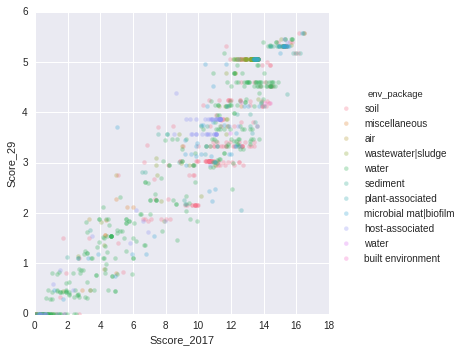

In [104]:
# lmplot crea imágenes de regresión lineal.

# Con la opcción hue le estamos pidiendo que use la columna env_package para colorear los
# puntos

# Con la opción fit_reg=False, le estoy pidiendo que NO ponga las regresiones
sns.lmplot(data=new_metadf, x='Sscore_2017', y='Score_29', 
           hue='env_package', 
           fit_reg=False, 
           scatter_kws={'alpha':0.3})
plt.xlim((0, 18))
plt.ylim((0, 6))

#plt.savefig('SS_SSpfam_color_scatter.png', dpi=200)

Con el mismo comando, podemos pedirle que separe los datos en diferentes gráficas, usando los datos de la columna env_package

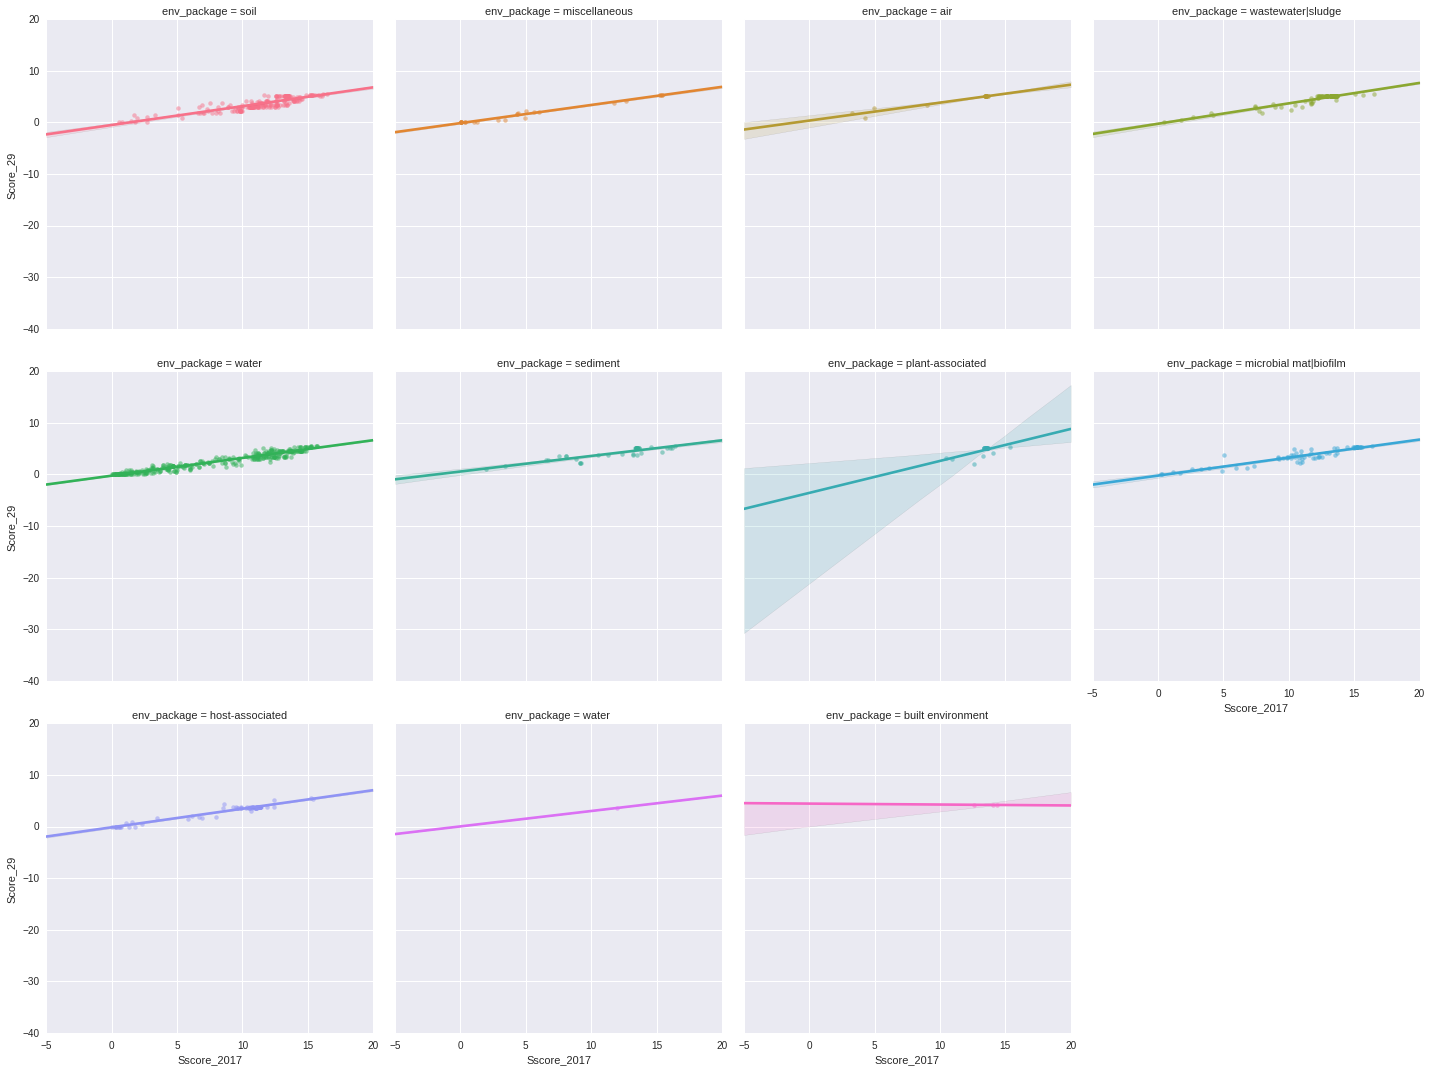

In [105]:
sns.lmplot(data=new_metadf, x='Sscore_2017', y='Score_29', 
           hue='env_package',  # las categorias de env_package usando colores
           col='env_package',  # las mismas categorías en las columnas de la gráfica
           col_wrap = 4,       # únicamente 4 columnas de gráficas
           fit_reg=True,       # le pedimos que si ponga la regreción con sus CI
           scatter_kws={'alpha':0.5})

In [106]:
from scipy import stats

Hacemos una función que haga todo el analisis y las gráficas. Así ya no tenemos que copiar y pegar todo el tiempo

In [107]:
def plot_reg(x_label, y_label, df, color=None):
    """Easy function to plot the regression of two
    variabels in a df and to draw the values of the 
    analysis. Uses seaborn module and scipy.stats.
    
    Parameters:
    ============
    
    - x_label: string.
               Name of the column in df to plot in x
    - y_label: string
               Name fo the column in df to plot in y
    - df: Pandas DataFrame
    - color: scatter color"""
    # - Calculate linear regression
    reg = stats.linregress(df[x_label], df[y_label])
    # - plot data
    g = sns.regplot(x_label, y_label, data=df, 
                    truncate=True,
                    scatter_kws={'alpha':0.4})
    # - Annotate de regression values
    s = "$r^2 = {:.3}$\n".format(reg.rvalue**2) +\
        "$p-value_r = {:.2}$\n".format(reg.pvalue) +\
        "Model: $y = {:.2}x +{:.2}$".format(reg.slope, reg.intercept)
    plt.annotate(s=s, 
                 xy=(.05, .75), 
                 bbox=dict(boxstyle="round", fc="w"),
                 xycoords='axes fraction')
    return g, reg

In [112]:
new_metadf.columns

Index(['MSL', 'Sscore_2017', 'Sscore_2014', '30', '60', '100', '150', '200',
       '250', '300', 'biome', 'feature', 'material', 'env_package', 'location',
       'latitude', 'longitude', 'depth', 'Score_4', 'Score_5', 'Score_6',
       'Score_7', 'Score_10', 'Score_11', 'Score_13', 'Score_16', 'Score_17',
       'Score_18', 'Score_19', 'Score_20', 'Score_22', 'Score_23', 'Score_28',
       'Score_29'],
      dtype='object')

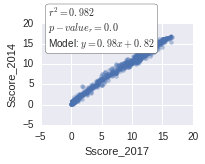

In [132]:
plt.subplot(2,2,1)
x= 'Sscore_2017'
y ='Sscore_2014'

with sns.axes_style("whitegrid"):
    plot_reg(x, y, new_metadf)
#plt.savefig('{}_vs_{}.png'.format(x,y), dpi=200)



# Estos scatter solo son para visualizar los datos

In [115]:
if 'Length' in new_metadf.columns:
    del new_metadf['Length']


In [116]:
new_metadf.columns

Index(['MSL', 'Sscore_2017', 'Sscore_2014', '30', '60', '100', '150', '200',
       '250', '300', 'biome', 'feature', 'material', 'env_package', 'location',
       'latitude', 'longitude', 'depth', 'Score_4', 'Score_5', 'Score_6',
       'Score_7', 'Score_10', 'Score_11', 'Score_13', 'Score_16', 'Score_17',
       'Score_18', 'Score_19', 'Score_20', 'Score_22', 'Score_23', 'Score_28',
       'Score_29'],
      dtype='object')

In [117]:
columns = ['Sscore_2017','Sscore_2014','Score_4', 'Score_5', 'Score_6',
       'Score_7', 'Score_10', 'Score_11', 'Score_13', 'Score_16', 'Score_17',
       'Score_18', 'Score_19', 'Score_20', 'Score_22', 'Score_23', 'Score_28',
       'Score_29']

indices = np.tril_indices(len(columns), k=-1)

for i, j in zip(indices[0], indices[1]):
    col1 = columns[i]
    col2 = columns[j]
    reg = stats.linregress(new_metadf[col1], new_metadf[col2])
    print("{:<15}vs {:<15}r-value = {:.4}".format(col1, col2, reg.rvalue**2))
   

Sscore_2014    vs Sscore_2017    r-value = 0.982
Score_4        vs Sscore_2017    r-value = 0.8781
Score_4        vs Sscore_2014    r-value = 0.8751
Score_5        vs Sscore_2017    r-value = 0.8112
Score_5        vs Sscore_2014    r-value = 0.7815
Score_5        vs Score_4        r-value = 0.6496
Score_6        vs Sscore_2017    r-value = 0.8831
Score_6        vs Sscore_2014    r-value = 0.8733
Score_6        vs Score_4        r-value = 0.9378
Score_6        vs Score_5        r-value = 0.6382
Score_7        vs Sscore_2017    r-value = 0.7702
Score_7        vs Sscore_2014    r-value = 0.7656
Score_7        vs Score_4        r-value = 0.8405
Score_7        vs Score_5        r-value = 0.5037
Score_7        vs Score_6        r-value = 0.7821
Score_10       vs Sscore_2017    r-value = 0.1756
Score_10       vs Sscore_2014    r-value = 0.2319
Score_10       vs Score_4        r-value = 0.2713
Score_10       vs Score_5        r-value = 0.09234
Score_10       vs Score_6        r-value = 0.2434


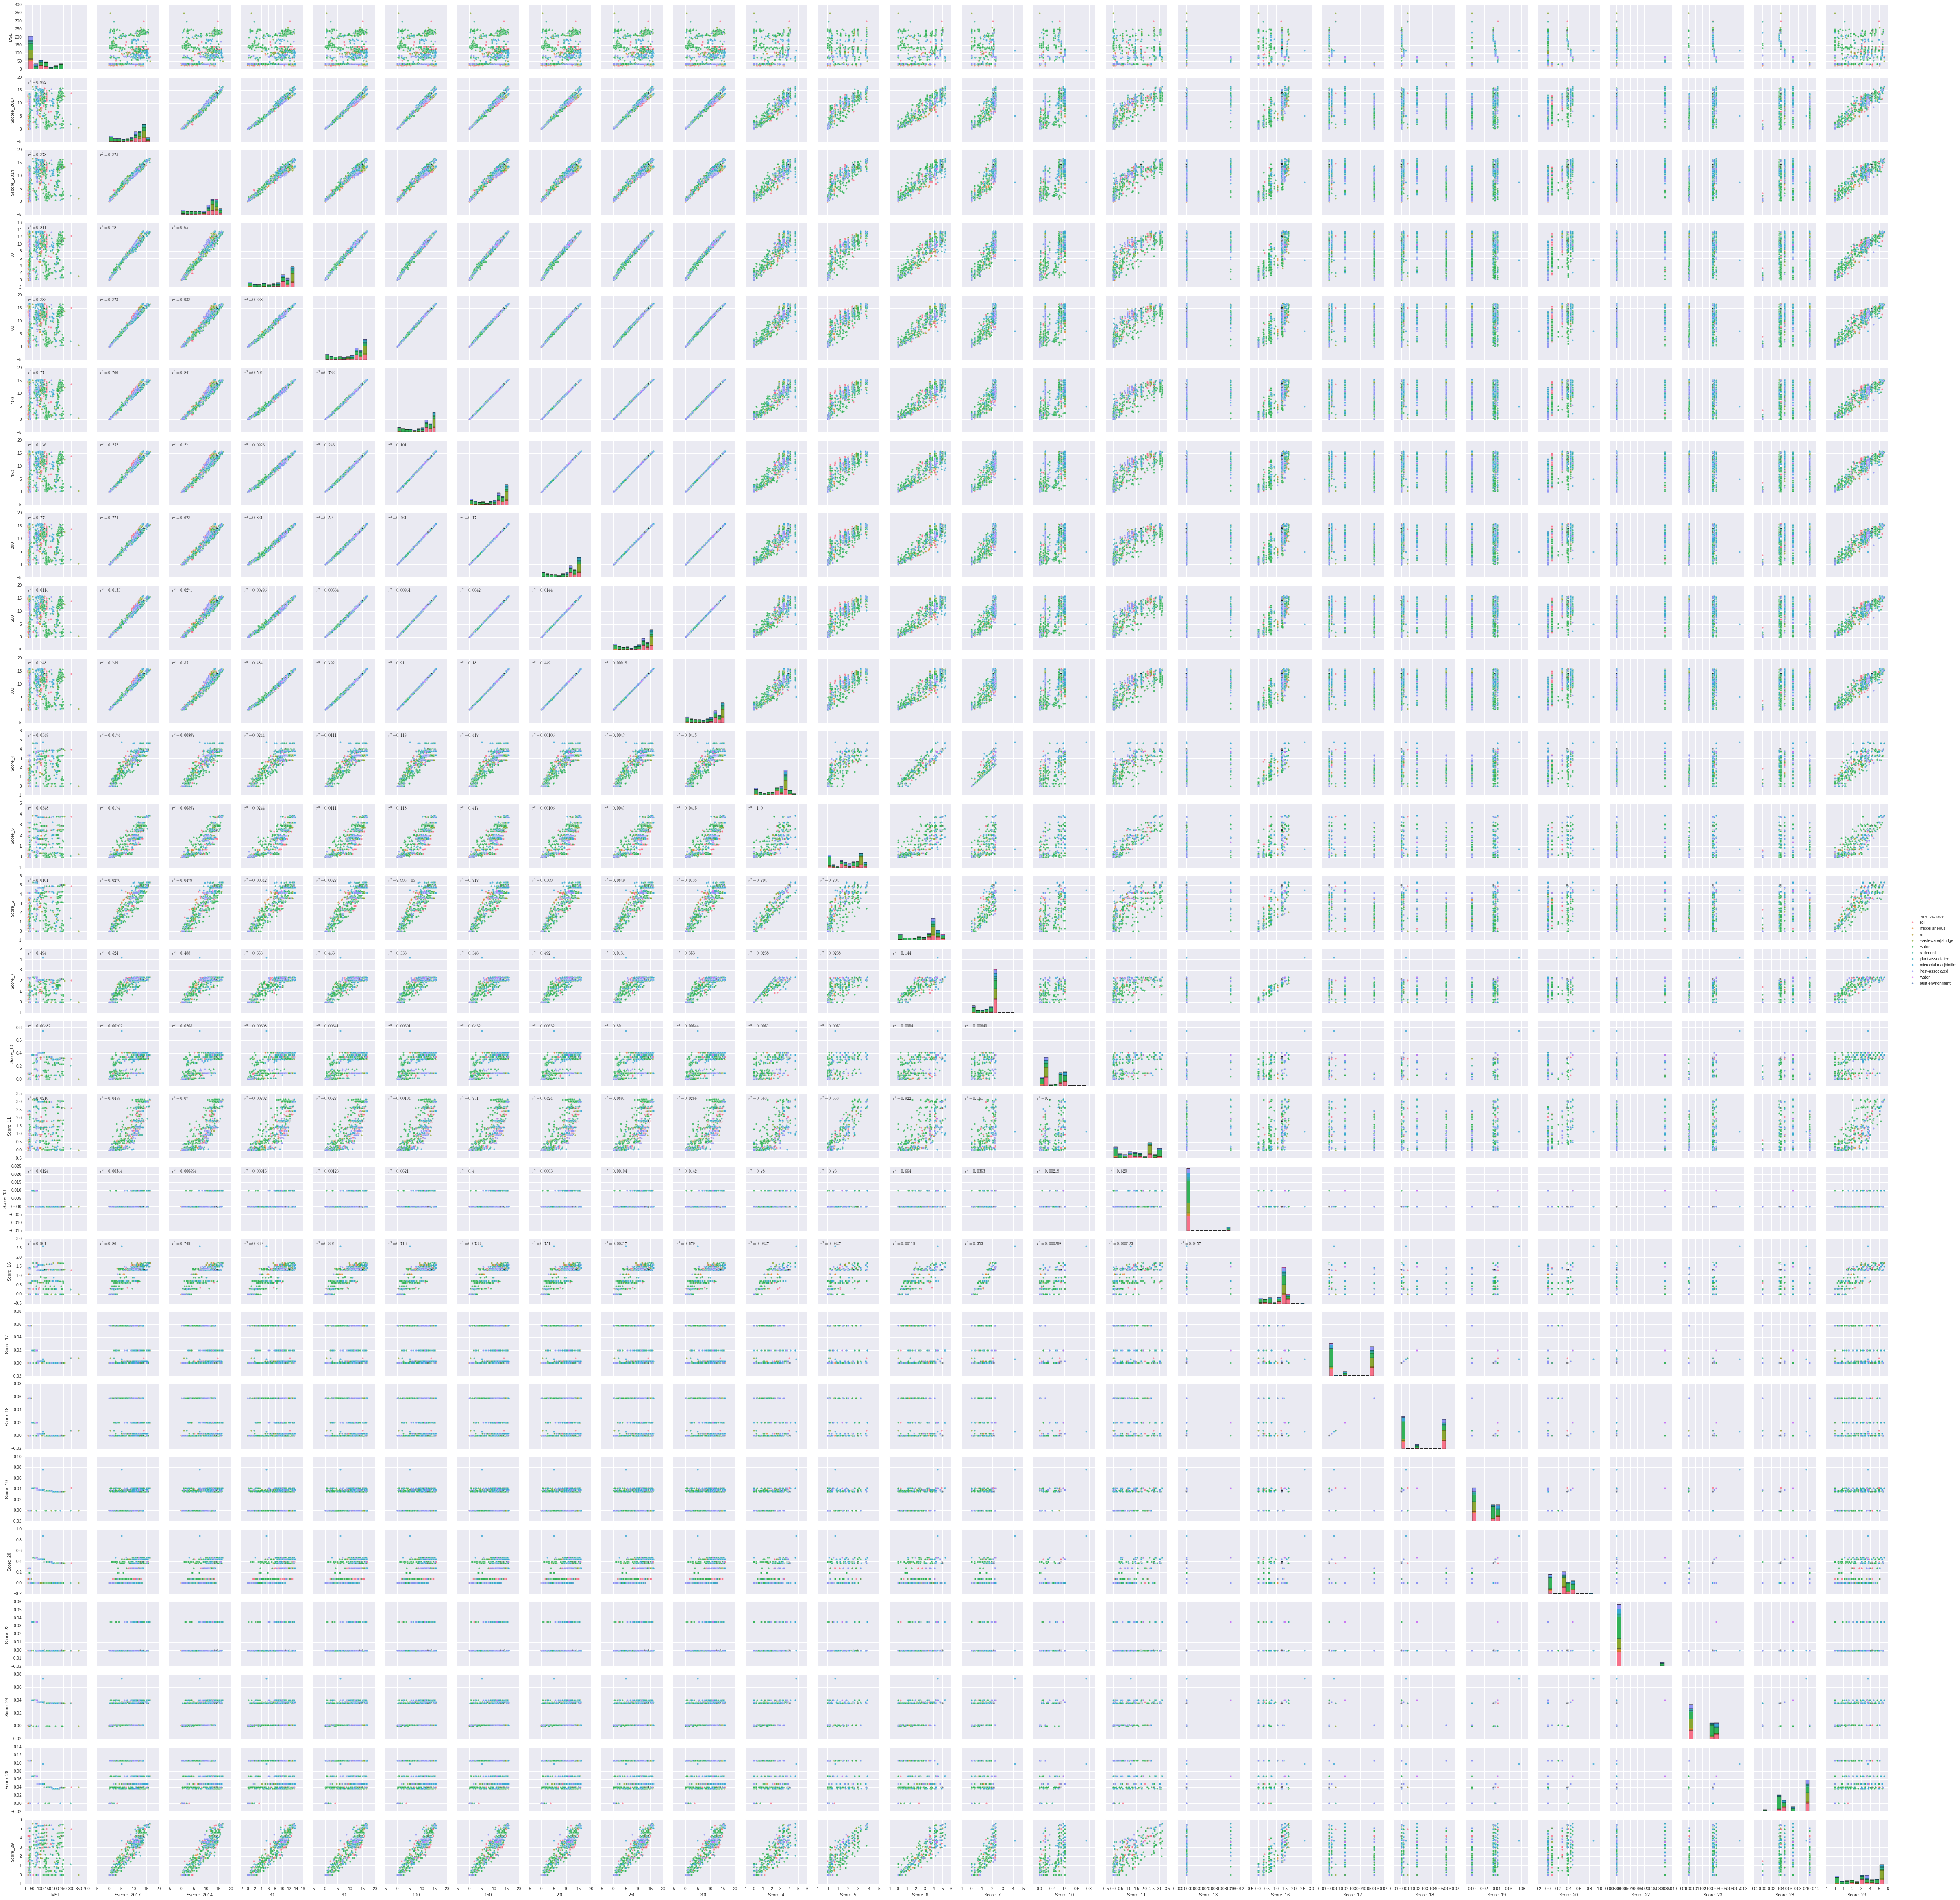

In [118]:
all_scatter = sns.pairplot(data=new_metadf,
             hue='env_package',
             plot_kws={'alpha':0.8})

axes = all_scatter.axes
for i, j in zip(indices[0], indices[1]):
    col1 = columns[i]
    col2 = columns[j]
    ax = axes[i, j]
    reg = stats.linregress(new_metadf[col1], new_metadf[col2])
    text = "$r^2 = {:.3}$".format(reg.rvalue**2)
    ax.annotate(text, (0.05, 0.9), xycoords='axes fraction')

plt.savefig('scatter_allVSall.png', dpi=300)

In [118]:
g = sns.PairGrid(new_metadf, diag_sharey=False)
g.map_lower(plt.scatter )
g.map_upper(sns.kdeplot, cmap="Blues_d")
g.map_diag(plt.hist, bins=20)

/usr/local/lib/python3.4/dist-packages/statsmodels/nonparametric/kernels.py:127: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.4/dist-packages/statsmodels/nonparametric/kernels.py:127: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.4/dist-packages/statsmodels/nonparametric/_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])


ValueError: zero-size array to reduction operation minimum which has no identity

KeyboardInterrupt: 

## Metagenomas con mayor SS



In [ ]:
columns = ['Sscore_2017','Sscore_2014','Score_1', 'Score_2', 'Score_4',
       'Score_5', 'Score_6', 'Score_7', 'Score_10', 'Score_11', 'Score_13',
       'Score_15', 'Score_16', 'Score_17', 'Score_18', 'Score_19', 'Score_20',
       'Score_21', 'Score_22', 'Score_23', 'Score_28', 'Score_29']

# calcular los psercentiles
percentiles = []

for col in columns:
    data = new_metadf[col]
    perc = np.percentile(data, 95)
    percentiles.append(perc)

In [ ]:
# crear las listas de meatgenomas
listas_meta = []

for i, col in enumerate(columns):
    perc = percentiles[i]
    mask = new_metadf[col] >= perc
    metas = new_metadf.index[mask]
    listas_meta.append(metas)

In [ ]:
# número de metagenomas en percentil 95
for i, col in enumerate(columns):
    print(col, ' n95 = {}'.format(len(listas_meta[i*936/100])))
    

In [ ]:
# tamaño del conjunto interseccion

for i, j in zip(indices[0], indices[1]):
    col1 = columns[i]
    col2 = columns[j]
    set1 = set(listas_meta[i])
    set2 = set(listas_meta[j])
    union_l = len(set1.intersection(set2))
    print("{:<15}vs {:<15}tamaño de la interseccion = {}".format(col1, col2, union_l))

In [ ]:
temp = {columns[i]: pd.Series(listas_meta[i].get_values())for i in range(len(columns))}
metas95 = pd.DataFrame(temp)
#metas95.to_csv('meta_perc95_allscores.tab', sep='\t')


In [ ]:
x = new_metadf.loc[listas_meta[0]]['feature']

In [ ]:
np.unique(x, return_counts=True)


In [ ]:
# vamos  a dejar las notas por si las flies

for i, col in enumerate(columns):
    data = listas_meta[i]
    subdf = new_metadf.loc[data]['feature']
    counts = np.unique(subdf, return_counts=True)
    dica = {'feature': counts[0], 'count': counts[1]}
    newdf = pd.DataFrame(dica)
    col = col.replace(' ', '_')
    #newdf.to_csv('{}-metas_perc95.tab'.format(col), sep='\t')